In [1]:
%matplotlib notebook

import pandas as pd
import yfinance as yf
import mplfinance as mf
import numpy as np
import matplotlib.pyplot as plt
from ta.trend import ADXIndicator
from indicator_funcs import sma, backtesting, buysell, ema, macd, rsi, in_squeeze, ttm, adx_indicator, dx 
from processData import grabTickers, parse_file, grabDataPaths, grabData
import xlrd
from datetime import datetime



In [2]:
today = pd.Timestamp('today')
xle = yf.download( 'XLE',
                        start = '2020-01-01',
                        end = today,
                        progress = False)

macd(xle)
rsi(xle)
ttm(xle)
adx_indicator(xle)



/home/crmartin/.local/lib/python3.8/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/home/crmartin/.local/lib/python3.8/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


,Open,High,Low,Close,Adj Close,Volume,macd,macd_indicator,rsi,rsi_indicator,...,Adj Open,Adj High,Adj Low,pos_directional_indicator,neg_directional_indicator,adx,di_pos,di_neg,trend_signal,adx_indicator
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,54.150002,55.220001,54.009998,55.160000,51.172787,24430500,56.997673,1,54.330744,1,...,50.235796,51.228451,50.105912,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2020-01-31,54.230000,54.380001,53.160000,53.439999,49.577118,33430500,56.450339,1,16.058357,0,...,50.310014,50.449173,49.317359,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2020-02-03,53.369999,53.450001,52.549999,52.740002,48.927715,21289200,55.879518,1,15.384585,0,...,49.512173,49.586392,48.751447,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2020-02-04,53.500000,53.919998,52.830002,52.930000,49.103981,19819800,55.425746,1,7.279650,0,...,49.632779,50.022417,49.011211,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2020-02-05,53.810001,55.110001,53.779999,54.919998,50.950134,34382000,55.347938,1,75.694495,1,...,49.920373,51.126402,49.892539,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,47.360001,48.220001,47.360001,47.860001,47.860001,17945900,-0.430051,0,57.252015,1,...,47.360001,48.220001,47.360001,17.712420,23.466458,15.042297,17.712420,23.466458,0,0
2021-04-27,48.040001,48.610001,47.820000,48.439999,48.439999,21134400,-0.365415,0,100.000000,1,...,48.040001,48.610001,47.820000,19.219298,22.349364,14.505695,19.219298,22.349364,0,0
2021-04-28,48.799999,50.299999,48.759998,50.110001,50.110001,32937000,-0.177391,0,100.000000,1,...,48.799999,50.299999,48.759998,26.935134,19.942300,14.535093,26.935134,19.942300,0,0


<IPython.core.display.Javascript object>


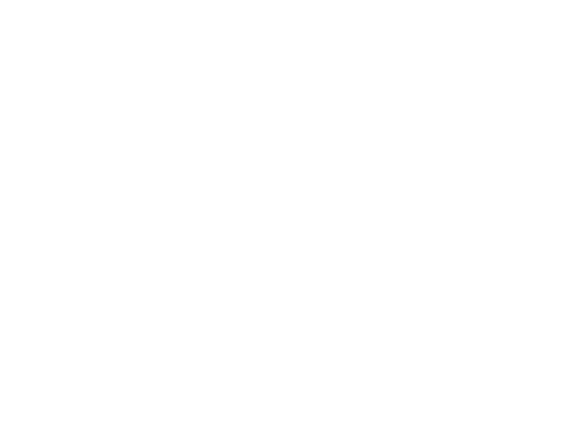

In [3]:
plt.close()
plt.plot(xle['rsi_indicator']+xle['adx_indicator']+xle['ttm_indicator']+xle['macd_indicator'])
plt.show()

In [4]:
tickers = grabTickers('tickersymbs.txt')
today = pd.Timestamp('today')


for n in range(0,10):
    globals()[tickers[n]] = yf.download(tickers[n],
                        start = '2020-01-01',
                        end = today,
                        progress = False)
    globals()[tickers[n]] = macd(globals()[tickers[n]])
    globals()[tickers[n]] = rsi(globals()[tickers[n]])
    globals()[tickers[n]] = ttm(globals()[tickers[n]])
    globals()[tickers[n]] = adx_indicator(globals()[tickers[n]]) 
    
    file = xlrd.open_workbook(tickers[n]+'_Final.xls')
    sheet = file.sheet_by_name('Sheet1')
    VIX = []
    date = []
    buy_sell = []
    dates_buy = []
    dates_sell = []
    
    # Get Data from Files
    for i in range(0,sheet.nrows):
        VIX.append(sheet.cell_value(i, 1))
        d = xlrd.xldate_as_datetime(sheet.cell_value(i, 0), 0)
        date.append(d.strftime("%Y-%m-%d"))

    d = dx(VIX)
    
    for k in range(4,len(d)):
        if(d[k] > 0):
            buy_sell.append(0)
            dates_buy.append(date[k])
        else:
            buy_sell.append(1)
            dates_sell.append(date[k])

    temp = np.zeros(len(globals()[tickers[n]])-len(VIX))
    temp2 = np.zeros(len(globals()[tickers[n]])-len(buy_sell))
    
    VIX = np.append(temp,VIX)
    indicator = np.append(temp2,buy_sell)

    globals()[tickers[n]]['vix'] = VIX
    globals()[tickers[n]]['vix_indicator'] = indicator

/home/crmartin/.local/lib/python3.8/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/home/crmartin/.local/lib/python3.8/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [5]:
XLK


,Open,High,Low,Close,Adj Close,Volume,macd,macd_indicator,rsi,rsi_indicator,...,Adj Low,pos_directional_indicator,neg_directional_indicator,adx,di_pos,di_neg,trend_signal,adx_indicator,vix,vix_indicator
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,97.139999,98.110001,96.550003,98.019997,96.598534,9966800,96.302217,1,100.000000,1,...,95.149858,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00,0.0
2020-01-31,97.449997,97.500000,94.989998,95.330002,93.947556,13482300,96.152645,1,28.835949,0,...,93.612482,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00,0.0
2020-02-03,95.440002,96.830002,95.330002,96.589996,95.189278,12537800,96.219930,1,43.841276,0,...,93.947555,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00,0.0
2020-02-04,98.269997,99.330002,98.029999,99.120003,97.682594,9548900,96.666095,1,58.487707,1,...,96.608397,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00,0.0
2020-02-05,100.750000,100.800003,98.980003,99.699997,98.254189,16348500,97.132849,1,100.000000,1,...,97.544636,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,142.750000,143.580002,142.649994,143.429993,143.429993,3867500,2.509782,1,62.888804,1,...,142.649994,27.236378,16.596786,23.380601,27.236378,16.596786,0,0,54.04,0.0
2021-04-27,143.660004,143.770004,142.570007,143.080002,143.080002,5411000,2.467538,1,88.993920,1,...,142.570007,26.773081,15.922457,23.525840,26.773081,15.922457,0,0,71.24,0.0
2021-04-28,142.250000,142.440002,141.410004,141.750000,141.750000,5345600,2.300225,1,30.290425,0,...,141.410004,25.236360,18.995484,22.853242,25.236360,18.995484,0,0,60.87,1.0


In [6]:
buy_sell = buysell(XLY,[1,1,1,1,1])
buy_sell

array([2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 2., 2., 2., 2.,
       2., 1., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 2.,
       2., 2., 2., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 3., 3., 3., 3., 2., 2., 1., 1., 2., 2., 2., 1., 1., 2., 1.,
       1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2.,
       2., 2., 1., 1., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 3., 3., 3.,
       3., 3., 3., 3., 3., 2., 2., 3., 3., 3., 3., 3., 2., 3., 3., 2., 2.,
       2., 2., 2., 3., 2., 3., 3., 2., 1., 1., 1., 1., 1., 0., 1., 1., 2.,
       3., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2., 2.,
       2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1., 2., 1., 1., 1., 1.,
       1., 2., 2., 2., 2.

<IPython.core.display.Javascript object>


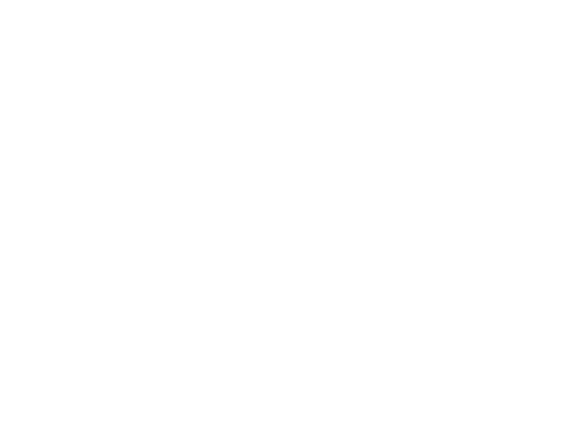

In [7]:
plt.close()
plt.plot(buy_sell)
#plt.plot(XLK['Close']/100)
plt.show()

In [22]:
weights = [1,1,1,1,1]
init_balance = 1000
backtesting(XLV,weights,init_balance)
#XLE

triggered hold
cash:  1000.0
stock:  0.0
triggered hold
cash:  1000.0
stock:  0.0
triggered hold
cash:  1000.0
stock:  0.0
triggered hold
cash:  1000.0
stock:  0.0
triggered hold
cash:  1000.0
stock:  0.0
triggered hold
cash:  1000.0
stock:  0.0
triggered buy
cash:  0.0
stock:  999.9999999999999
triggered hold
cash:  0.0
stock:  993.7360275339046
triggered hold
cash:  0.0
stock:  981.7230372688783
triggered hold
cash:  0.0
stock:  979.4061995278469
triggered hold
cash:  0.0
stock:  977.7758370779275
triggered hold
cash:  0.0
stock:  984.5546332794133
triggered hold
cash:  0.0
stock:  974.6867637338102
triggered sell
cash:  966.2776705482918
stock:  0.0
triggered hold
cash:  966.2776705482918
stock:  0.0
triggered hold
cash:  966.2776705482918
stock:  0.0
triggered hold
cash:  966.2776705482918
stock:  0.0
triggered hold
cash:  966.2776705482918
stock:  0.0
triggered hold
cash:  966.2776705482918
stock:  0.0
triggered hold
cash:  966.2776705482918
stock:  0.0
triggered hold
cash:  966.2

<IPython.core.display.Javascript object>


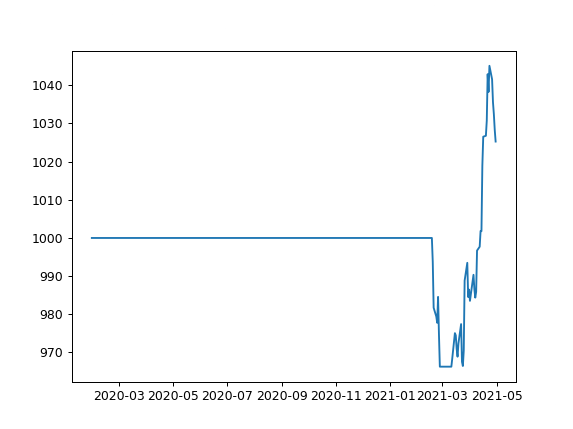

In [24]:
plt.close()
plt.plot(XLV['total_balance'])
#plt.plot(XLF['overall_indicator'])
plt.show()

<IPython.core.display.Javascript object>


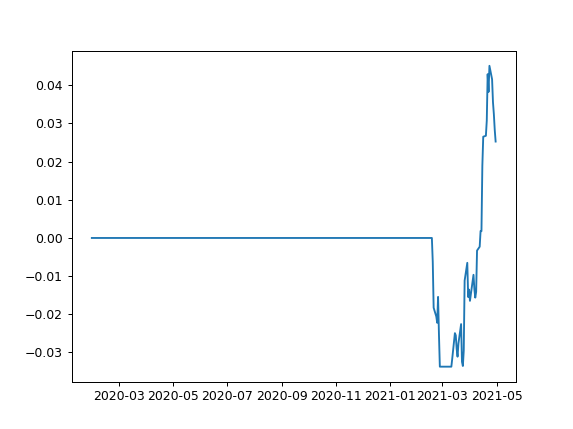

In [25]:
plt.close()
plt.plot(XLV['returns'])
#plt.plot(XLF['overall_indicator'])
plt.show()